In [1]:
from datetime import datetime
now = datetime.now()
print(now)

2021-01-22 20:15:10.133984


In [2]:
print("Name : Ramesh Bhutka")
print("Sap ID:- 53004190003")

Name : Ramesh Bhutka
Sap ID:- 53004190003


## Logistic Regression

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Ramesh-Bhutka/AAI/main/titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<AxesSubplot:>

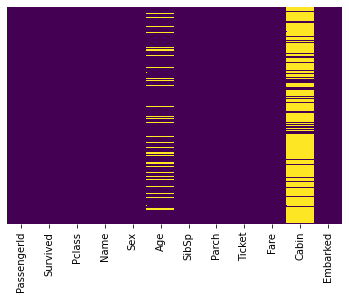

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:>

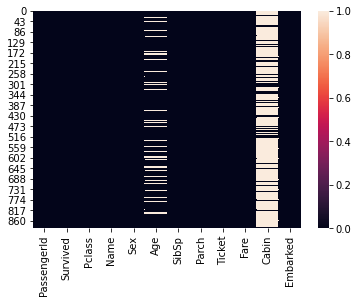

In [10]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

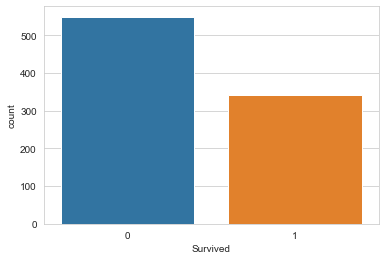

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

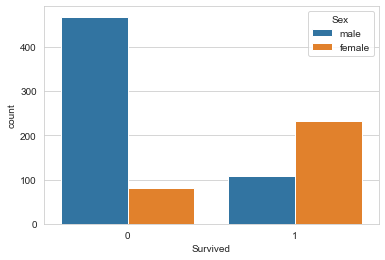

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

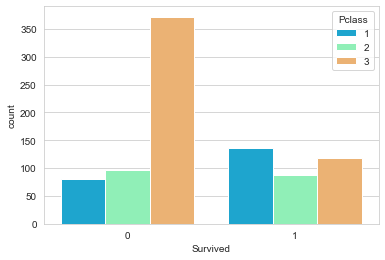

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=df,hue='Pclass', palette='rainbow')

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

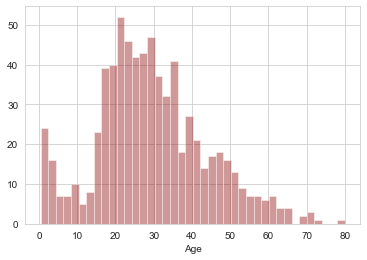

In [14]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

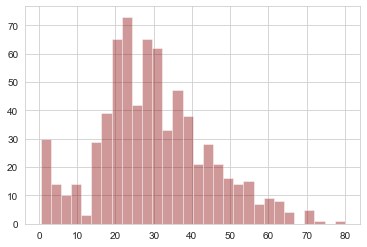

In [15]:
df.Age.hist(bins=30,color='darkred',alpha=0.4)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

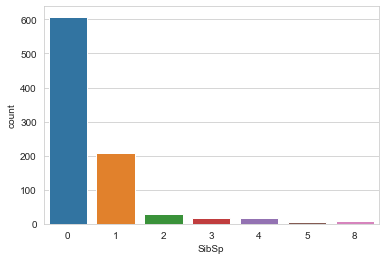

In [16]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

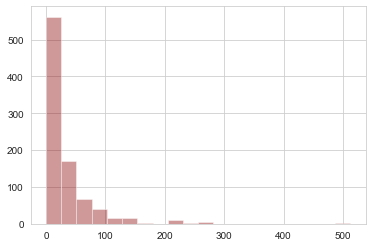

In [17]:
df.Fare.hist(bins=20,color='darkred',alpha=0.4)

### data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

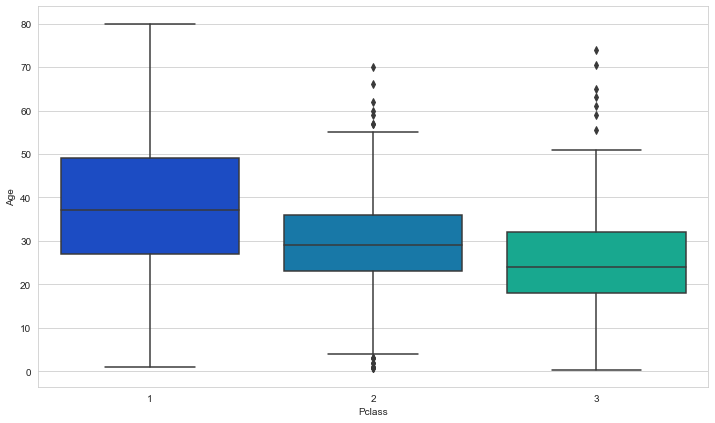

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df, palette='winter')

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

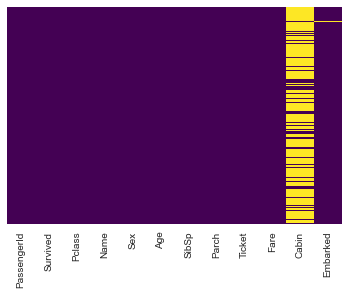

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df.drop('Cabin',axis=1, inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

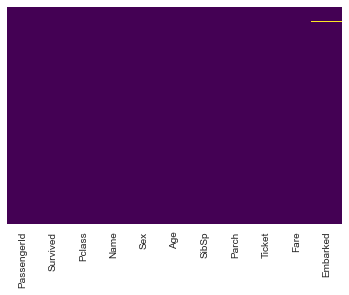

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df.Embarked.mode()

0    S
dtype: object

In [26]:
df.Embarked.fillna("S", inplace = True) 

In [27]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### Converting Categorical Features

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [29]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [31]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
df = pd.concat([df,sex,embark],axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression model

#### Train Test Split

In [35]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [36]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[136,  21],
       [ 32,  79]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8022388059701493

In [46]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

### Evaluation

In [47]:
tp, fp, fn, tn = confusion_matrix(y_test, predictions).ravel()
print('TP ->' , tp)
print('FP ->' , fp)
print('FN ->' , fn)
print('Tn ->' , tn)

TP -> 136
FP -> 21
FN -> 32
Tn -> 79


In [48]:
# printing the result in form of confusion matrix and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Classification matrix : \n',confusion_matrix(y_test, predictions))
from sklearn.metrics import classification_report
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predictions,labels=[1,0])
print('Classification report : \n',matrix)

Classification matrix : 
 [[136  21]
 [ 32  79]]
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.71      0.75       111
           0       0.81      0.87      0.84       157

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [49]:
# calculating the accuracy
accuracy = accuracy_score(y_test, predictions)*100
accuracy

80.22388059701493

In [50]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != predictions).sum()))

Number of mislabeled points out of a total 268 points : 53
